## Part 1: Cluster Analysis and CSV Export

In this section, we analyze customer clusters generated from prior clustering steps.  
We break down each cluster by various attributes (e.g., region, favorite category, spending quartile)  
and save the summarized results into **separate CSV files**.  

Each CSV contains:
- The number of customers in each attribute group per cluster
- A `Total_Customers` column showing the overall size of each cluster
- Rows representing clusters
- Columns representing attribute values

In [25]:
import pandas as pd

# Load CSV
df = pd.read_csv("clustering_results.csv")

# Step 1: Regions
# Melt the DataFrame so regions become a single column
region_cols = ["Region_Asia", "Region_Europe", "Region_North America", "Region_South America"]
df_melted = df.melt(id_vars=["Cluster"], value_vars=region_cols,
                    var_name="Region", value_name="Present")

# Filter only rows where the region column is 1 (meaning customer is from that region)
df_melted = df_melted[df_melted["Present"] == 1]

# Create cross-tab: count customers per cluster per region
region_cluster_counts = pd.crosstab(df_melted["Cluster"], df_melted["Region"])

# Add total customers per cluster
region_cluster_counts["Total_Customers"] = region_cluster_counts.sum(axis=1)

print(region_cluster_counts)

# Save to CSV
region_cluster_counts.to_csv("cluster_region_counts.csv")

Region   Region_Asia  Region_Europe  Region_North America  \
Cluster                                                     
0                  9              5                     6   
1                 18             21                    21   
2                  9              9                     7   
3                  9             15                    12   

Region   Region_South America  Total_Customers  
Cluster                                         
0                          11               31  
1                          21               81  
2                           9               34  
3                          18               54  


In [26]:
# Step 2: Categories
# Melt the DataFrame so categories become a single column
category_cols = ["favorite_category_Books", "favorite_category_Clothing", "favorite_category_Electronics", "favorite_category_Home Decor"]
df_melted = df.melt(id_vars=["Cluster"], value_vars=category_cols,
                    var_name="category", value_name="Present")

# Filter only rows where the category column is 1 (meaning customer purchased from that category)
df_melted = df_melted[df_melted["Present"] == 1]

# Create cross-tab: count customers per cluster per category
category_cluster_counts = pd.crosstab(df_melted["Cluster"], df_melted["category"])

# Add total customers per cluster
category_cluster_counts["Total_Customers"] = category_cluster_counts.sum(axis=1)

print(category_cluster_counts)

# Save to CSV
category_cluster_counts.to_csv("cluster_category_counts.csv")


category  favorite_category_Books  favorite_category_Clothing  \
Cluster                                                         
0                              10                           6   
1                              26                          17   
2                              10                          11   
3                              22                          11   

category  favorite_category_Electronics  favorite_category_Home Decor  \
Cluster                                                                 
0                                    10                             5   
1                                    23                            15   
2                                     5                             8   
3                                     7                            14   

category  Total_Customers  
Cluster                    
0                      31  
1                      81  
2                      34  
3                      54  


In [27]:
# Step 3: Total Spend
# Create quartiles for total spend
df["TotalSpendQuartile"] = pd.qcut(df["total_spend"], 4, duplicates="drop")

# Crosstab: count customers in each spend quartile per cluster
total_spend_counts = pd.crosstab(df["Cluster"], df["TotalSpendQuartile"])

# Add total customers per cluster
total_spend_counts["Total_Customers"] = total_spend_counts.sum(axis=1)

print("Total Spend Quartiles per Cluster")
print(total_spend_counts)

# Save
total_spend_counts.to_csv("cluster_total_spend_quartiles.csv")

Total Spend Quartiles per Cluster
TotalSpendQuartile  (82.359, 2137.54]  (2137.54, 3137.42]  \
Cluster                                                     
0                                   0                   0   
1                                  16                  50   
2                                  34                   0   
3                                   0                   0   

TotalSpendQuartile  (3137.42, 4764.412]  (4764.412, 10673.87]  Total_Customers  
Cluster                                                                         
0                                     0                    31               31  
1                                    15                     0               81  
2                                     0                     0               34  
3                                    35                    19               54  


In [28]:
# Step 4: Average Order Value
# Create quartiles for average order value
df["AvgSpendQuartile"] = pd.qcut(df["avg_order_value"], 4, duplicates="drop")

# Crosstab: count customers in each avg spend quartile per cluster
avg_spend_counts = pd.crosstab(df["Cluster"], df["AvgSpendQuartile"])

# Add total customers per cluster
avg_spend_counts["Total_Customers"] = avg_spend_counts.sum(axis=1)

print("\nAverage Spend Quartiles per Cluster")
print(avg_spend_counts)

# Save
avg_spend_counts.to_csv("cluster_avg_spend_quartiles.csv")


Average Spend Quartiles per Cluster
AvgSpendQuartile  (82.359, 539.231]  (539.231, 677.19]  (677.19, 825.982]  \
Cluster                                                                     
0                                 1                  2                 11   
1                                24                 30                 17   
2                                21                  7                  2   
3                                 4                 11                 20   

AvgSpendQuartile  (825.982, 1323.133]  Total_Customers  
Cluster                                                 
0                                  17               31  
1                                  10               81  
2                                   4               34  
3                                  19               54  


In [29]:
# Step 5: Quantity Purchased
# Calculate quantity purchased as total_spend / avg_order_value
df["quantity"] = df["total_spend"] / df["avg_order_value"]

# Create quartiles for quantity purchased 
df["QuantityQuartile"] = pd.qcut(df["quantity"], 4, duplicates="drop")

# Crosstab: count customers in each quantity purchased quartile per cluster
quantity_counts = pd.crosstab(df["Cluster"], df["QuantityQuartile"])

# Add total customers per cluster
quantity_counts["Total_Customers"] = quantity_counts.sum(axis=1)

print("\nQuantity Purchased Quartiles per Cluster")
print(quantity_counts)

# Save
quantity_counts.to_csv("cluster_quantity_purchased_quartiles.csv")


Quantity Purchased Quartiles per Cluster
QuantityQuartile  (0.999, 3.0]  (3.0, 5.0]  (5.0, 6.0]  (6.0, 11.0]  \
Cluster                                                               
0                            0           4           1           26   
1                           23          41          11            6   
2                           28           6           0            0   
3                            2          18          17           17   

QuantityQuartile  Total_Customers  
Cluster                            
0                              31  
1                              81  
2                              34  
3                              54  


In [30]:
# Step 6: Signup Date Quartiles (date ranges)
# Ensure SignupDate is datetime
df["SignupDate"] = pd.to_datetime(df["SignupDate"])

# Calculate quartile cut points
quartile_edges = df["SignupDate"].quantile([0, 0.25, 0.5, 0.75, 1.0])

# Convert to date strings for labels
labels = [
    f"{quartile_edges.iloc[i].date()} to {quartile_edges.iloc[i+1].date()}"
    for i in range(len(quartile_edges) - 1)
]

# Create quartile bins using the actual date boundaries
df["SignupDateQuartile"] = pd.cut(df["SignupDate"], bins=quartile_edges, labels=labels, include_lowest=True)

# Crosstab: count customers in each date range per cluster
signup_quartile_counts = pd.crosstab(df["Cluster"], df["SignupDateQuartile"])

# Add total customers per cluster
signup_quartile_counts["Total_Customers"] = signup_quartile_counts.sum(axis=1)

print("\nSignup Date Quartiles per Cluster (Date Ranges)")
print(signup_quartile_counts)

# Save
signup_quartile_counts.to_csv("cluster_signup_date_quartiles.csv")


Signup Date Quartiles per Cluster (Date Ranges)
SignupDateQuartile  2022-01-22 to 2022-09-26  2022-09-26 to 2023-08-31  \
Cluster                                                                  
0                                          8                        10   
1                                         25                        16   
2                                          7                         8   
3                                         10                        16   

SignupDateQuartile  2023-08-31 to 2024-04-12  2024-04-12 to 2024-12-28  \
Cluster                                                                  
0                                          5                         8   
1                                         22                        18   
2                                         11                         8   
3                                         12                        16   

SignupDateQuartile  Total_Customers  
Cluster                

## Part 2: Visualization of Cluster Attributes

This section generates **six bar charts** summarizing how customers are distributed across clusters for different attributes:
1. **Region**
2. **Favorite Category**
3. **Total Spend Quartiles**
4. **Average Order Value Quartiles**
5. **Quantity Purchased Quartiles**
6. **Signup Date Quartiles**

The plots use a **consistent color scheme**, and **legends are placed outside** the charts to avoid overlap.  
All six charts are arranged in a **3×2 grid** and saved together as a high-resolution PNG file in the  
`visualizations/` folder for easy reference and inclusion in reports.

Visualizations saved to: /workspaces/Customers/visualizations/clustering_analyses_visualizations.png


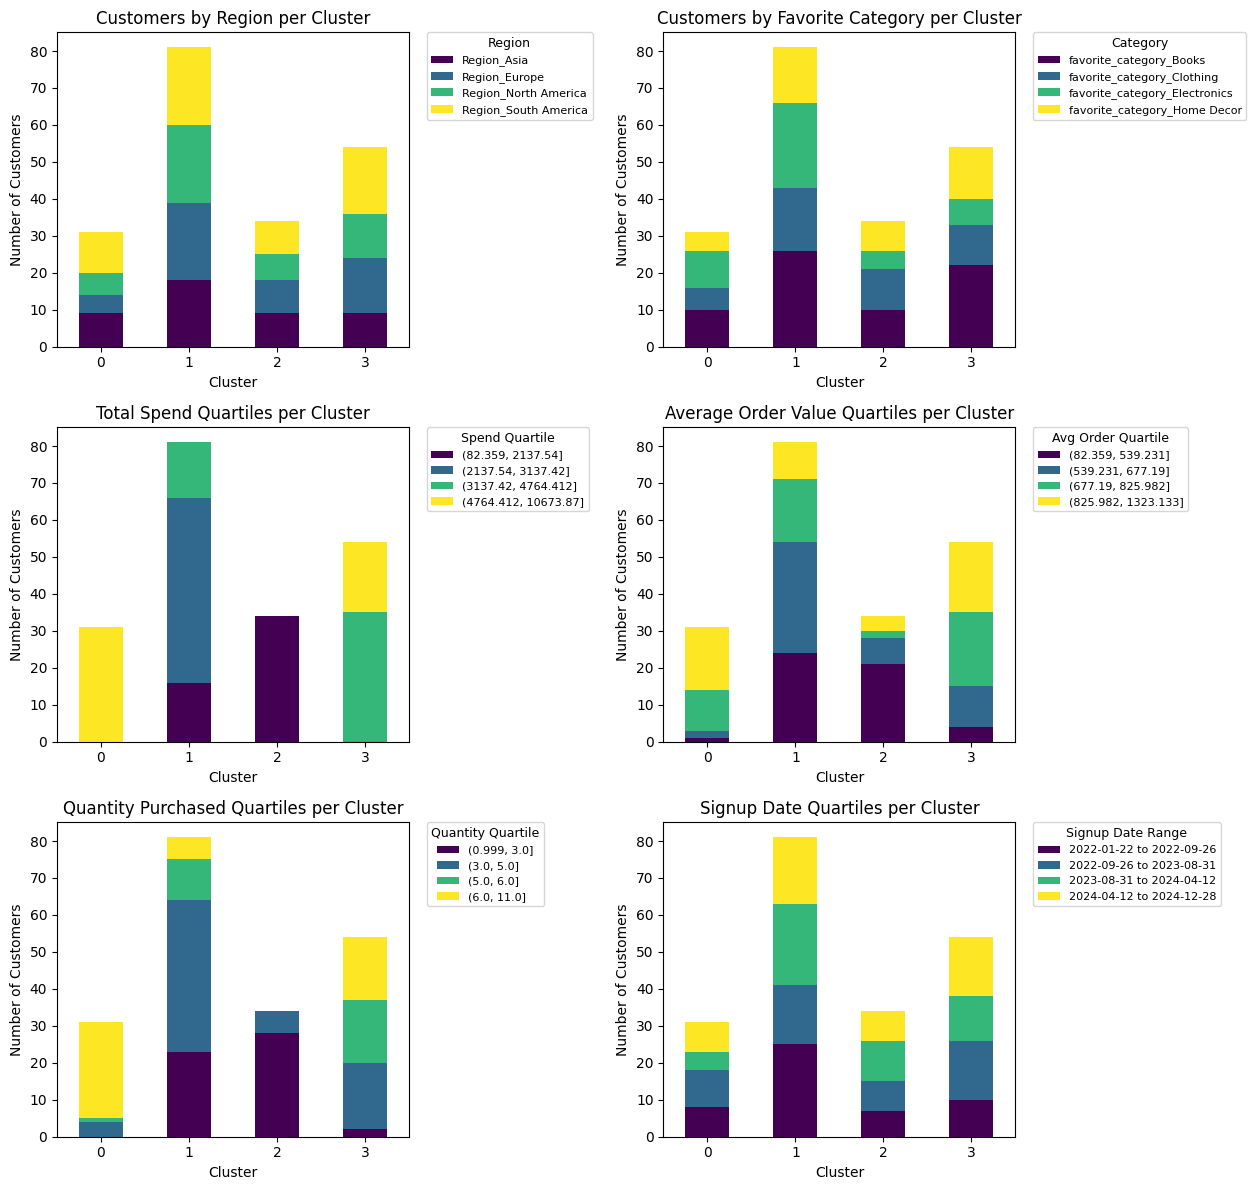

In [31]:
import matplotlib.pyplot as plt
import os

# Create a 3x2 subplot grid
fig, axes = plt.subplots(3, 2, figsize=(15, 12))
axes = axes.flatten()

# Common color map
cmap = "viridis"

# Function to format each subplot consistently
def plot_cluster_data(ax, data, title, xlabel, ylabel, legend_title):
    data.drop(columns=["Total_Customers"]).plot(
        kind="bar", stacked=True, colormap=cmap, ax=ax
    )
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.tick_params(axis="x", rotation=0)
    # Place legend outside
    ax.legend(title=legend_title, fontsize=8, title_fontsize=9,
              bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0.)

# Step 1: Regions
plot_cluster_data(
    axes[0], region_cluster_counts,
    "Customers by Region per Cluster", "Cluster", "Number of Customers", "Region"
)

# Step 2: Categories
plot_cluster_data(
    axes[1], category_cluster_counts,
    "Customers by Favorite Category per Cluster", "Cluster", "Number of Customers", "Category"
)

# Step 3: Total Spend Quartiles
plot_cluster_data(
    axes[2], total_spend_counts,
    "Total Spend Quartiles per Cluster", "Cluster", "Number of Customers", "Spend Quartile"
)

# Step 4: Average Order Value Quartiles
plot_cluster_data(
    axes[3], avg_spend_counts,
    "Average Order Value Quartiles per Cluster", "Cluster", "Number of Customers", "Avg Order Quartile"
)

# Step 5: Quantity Purchased Quartiles
plot_cluster_data(
    axes[4], quantity_counts,
    "Quantity Purchased Quartiles per Cluster", "Cluster", "Number of Customers", "Quantity Quartile"
)

# Step 6: Signup Date Quartiles (sorted)
quartile_order = list(signup_quartile_counts.columns.drop("Total_Customers"))
quartile_order.sort(key=lambda x: pd.to_datetime(x.split(" to ")[0]))
signup_quartile_counts[quartile_order].plot(
    kind="bar", stacked=True, colormap=cmap, ax=axes[5]
)
axes[5].set_title("Signup Date Quartiles per Cluster")
axes[5].set_xlabel("Cluster")
axes[5].set_ylabel("Number of Customers")
axes[5].tick_params(axis="x", rotation=0)
axes[5].legend(title="Signup Date Range", fontsize=8, title_fontsize=9,
               bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0.)

# Adjust layout for space for legends
plt.tight_layout(rect=[0, 0, 0.85, 1])

# Save to ../visualizations/clustering_analyses_visualizations.png
png_filename = "clustering_analyses_visualizations.png"
save_path = os.path.join("..", "visualizations", png_filename)
plt.savefig(save_path, dpi=300)
print(f"Visualizations saved to: {os.path.abspath(save_path)}")

# Show plot
plt.show()

plt.close()